# Projeto Ciencia dos Dados
## Cluesterização de filmes do imdB

#### Vitor Satyro, Iago Mendes, Gabriel Ligeiro


- Hieraquica Cluster   http://www.dummies.com/programming/big-data/data-science/data-science-performing-hierarchical-clustering-with-python/

- Kmean Cluster https://datascience.stackexchange.com/questions/16700/confused-about-how-to-apply-kmeans-on-my-a-dataset-with-features-extracted

- Kmean Cluster2 https://stackoverflow.com/questions/28017091/will-pandas-dataframe-object-work-with-sklearn-kmeans-clustering

- Todos os tipos de Clusters http://scikit-learn.org/stable/modules/clustering.html

- Livro postado pelo Miranda: Kmeans - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [1]:
import pandas as pd
from scipy import stats
from math import *
import numpy as np
from sklearn.cluster import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")
from pylab import *

%matplotlib inline

In [2]:
df = pd.read_csv('Dataset/movies_metadata.csv')

C:\Users\vitor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Pegar colunas especificas
colunas = ["popularity","runtime","vote_average","vote_count"]
df_ = df[colunas]

In [4]:
#Escolher 4000 colunas aleatorias para um novo dataset
n = 4000
df2 = df_.loc[np.random.choice(df_.index,size=n),:]

df3 = df2.dropna()


In [5]:
for c in colunas:
    df3.loc[:,c] = pd.to_numeric(df3.loc[:,c])
    


C:\Users\vitor\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\vitor\Anaconda3\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [6]:
#Cluster the data
std = stats.zscore(df3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(std)
labels = kmeans.labels_

#Glue back to originaal data
df3['clusters'] = labels

#Add the column into our list
colunas.extend(['clusters'])
df4 = df3[colunas]

#Lets analyze the clusters
print (df4.groupby('clusters').mean())

          popularity     runtime  vote_average   vote_count
clusters                                                   
0           2.934680   95.161345      6.138341    79.013683
1          25.284392  118.500000      6.918750  4420.656250
2           0.393041   79.483871      1.060369     2.389401


C:\Users\vitor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


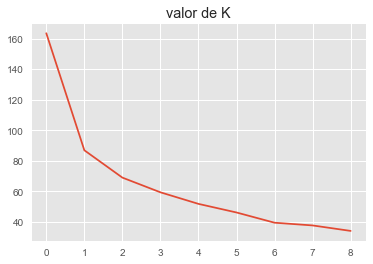

plot variancia de k entre 1,10


In [7]:
from scipy import cluster

initial = [cluster.vq.kmeans(df4,i) for i in range(1,10)]
plt.plot([var for (cent,var) in initial])
plt.title("valor de K")
plt.show()

print("plot variancia de k entre 1,10")

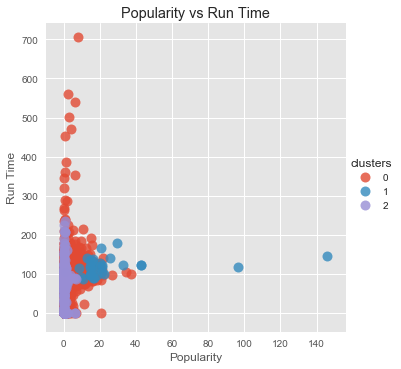

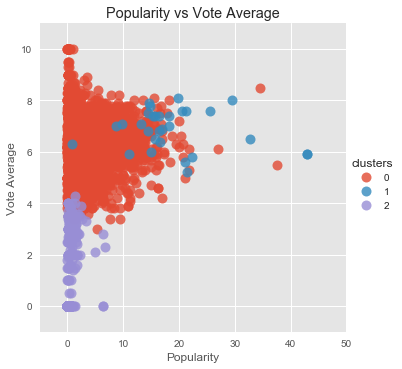

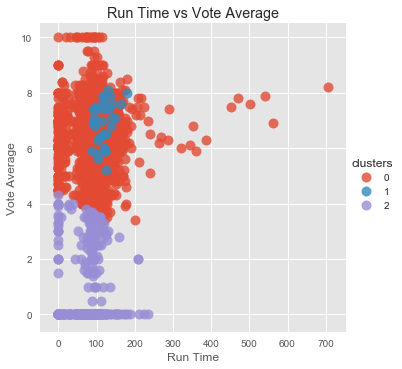

In [8]:
#Plotting popularity / runtime

sns.lmplot('popularity', 'runtime', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Popularity vs Run Time')
#plt.axis([-5,50,-10,600])
plt.xlabel('Popularity')
plt.ylabel('Run Time')

#Plotting popularity / vote_average

sns.lmplot('popularity', 'vote_average', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Popularity vs Vote Average')
plt.axis([-5,50,-1,11])
plt.xlabel('Popularity')
plt.ylabel('Vote Average')


#Plotting runtime / vote_average

sns.lmplot('runtime', 'vote_average', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Run Time vs Vote Average')
plt.xlabel('Run Time')
plt.ylabel('Vote Average')


Cluster 0 contains 3895 samples
Cluster 1 contains 72 samples
Cluster 2 contains 7 samples


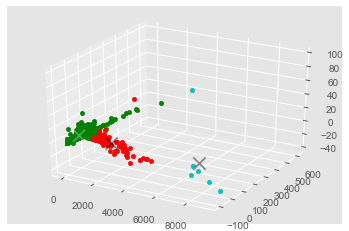

In [9]:
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from sklearn.decomposition import PCA

#X = np.array([[1, 2, 5],
#               [5, 8, 2],
#               [1.5, 1.8, 6],
#               [8, 8, 9],
#               [1, 0.6, 10],
#               [2.5, 3.8, 6],
#               [2.5, 5.8, 9],
#              [5, 8, 3],
#               [4, 0.6, 7],
#               [2.5, 1.8, 4.6],
#               [6.5, 1.8, 12],
#               [7, 8, 9],
#              [2, 0.6, 7],
#               [5.5, 1.8, 4],
#               [4.8, 6.9, 6],
#               [4.9, 9.8, 2],
#               [9, 11, 12]])

Array = np.array(df4)
pca = PCA(n_components=3)
pca.fit(Array)

Xa = pca.transform(Array)
X = Xa

cluster_num = 3

kmeans = KMeans(n_clusters=cluster_num)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# print ("centroids : ",centroids)

# print ("labels : ", labels)


colors = ["g","r","c"]

color = np.random.rand(cluster_num)

c = Counter(labels)


fig = figure()
ax = fig.gca(projection='3d')


for i in range(len(X)):
#     print("coordinate:",X[i], "label:", labels[i])
#     print ("i : ",i)
#     print ("color[labels[i]] : ",color[labels[i]])
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]]) #color[labels[i]]


for cluster_number in range(cluster_num):
    print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))

ax.scatter(centroids[:, 0],centroids[:, 1], centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 100, c=color)

plt.show()

## Progredindo ##
A partir do grafico plotado acima, percebemos que o eixo de duração não influencia na clusterização do nosso dataframe.


Portanto, resolvemos considerar apenas os filmes mais populares, tentando identificar padrões presentes e adicionando novas variáveis à análise.

In [10]:
data = df.copy()
colunas = ["budget","popularity","vote_average"]
df3 = data[colunas]
df3 = df3[~df3.budget.str.contains(".jpg")]

In [11]:
for c in colunas:
    df3.loc[:,c] = pd.to_numeric(df3.loc[:,c])

In [12]:
df3 = df3[(df3.budget > 0) & (df3.popularity > 5.0) & (df3.vote_average > 0)]


In [13]:
#Cluster the data
std = stats.zscore(df3)
kmeans = KMeans(n_clusters=3, random_state=0).fit(std)
labels = kmeans.labels_

#Glue back to originaal data
df3['clusters'] = labels

#Add the column into our list
colunas.extend(['clusters'])
df4 = df3[colunas]

#Lets analyze the clusters
print (df4.groupby('clusters').mean())

                budget  popularity  vote_average
clusters                                        
0         2.851074e+07    9.320586      5.523070
1         1.792387e+07   10.295142      6.950745
2         1.363278e+08   26.102543      6.508046


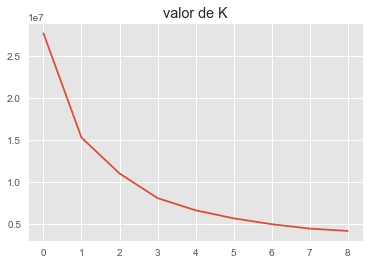

plot variancia de k entre 1,10


In [14]:
initial = [cluster.vq.kmeans(df4,i) for i in range(1,10)]
plt.plot([var for (cent,var) in initial])
plt.title("valor de K")
plt.show()

print("plot variancia de k entre 1,10")

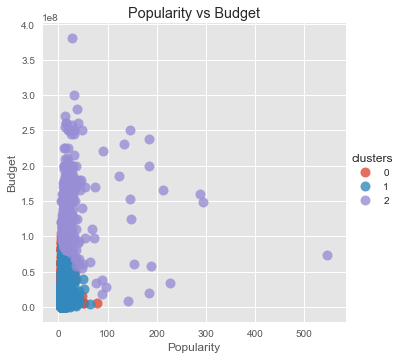

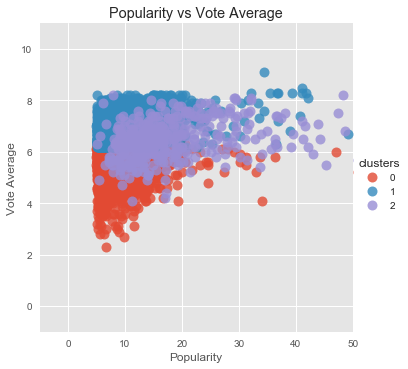

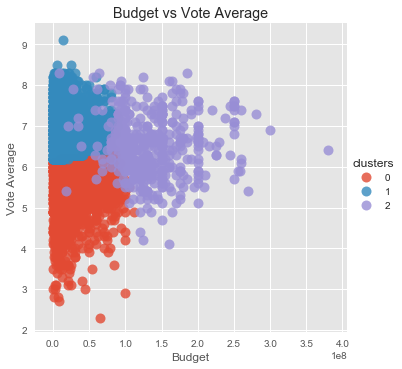

In [15]:
#Plotting popularity / runtime

sns.lmplot('popularity', 'budget', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Popularity vs Budget')
#plt.axis([-5,50,-10,600])
plt.xlabel('Popularity')
plt.ylabel('Budget')

#Plotting popularity / vote_average

sns.lmplot('popularity', 'vote_average', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Popularity vs Vote Average')
plt.axis([-5,50,-1,11])
plt.xlabel('Popularity')
plt.ylabel('Vote Average')


#Plotting runtime / vote_average

sns.lmplot('budget', 'vote_average', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Budget vs Vote Average')
plt.xlabel('Budget')
plt.ylabel('Vote Average')

Cluster 0 contains 3755 samples
Cluster 1 contains 301 samples
Cluster 2 contains 1157 samples


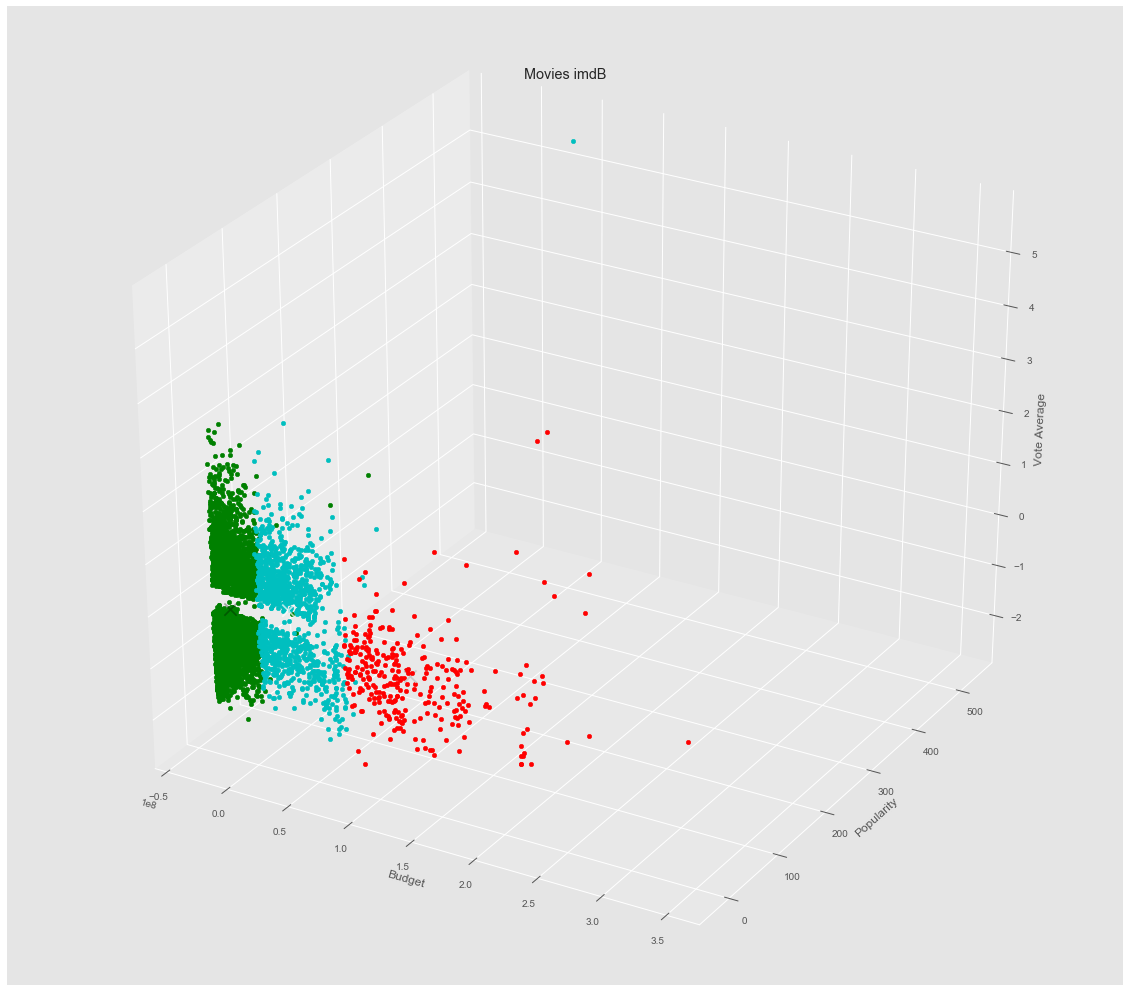

In [16]:
df4 = df3
Array = np.array(df4)
pca = PCA(n_components=3)
pca.fit(Array)

Xa = pca.transform(Array)
X = Xa

cluster_num = 3

kmeans = KMeans(n_clusters=cluster_num)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# print ("centroids : ",centroids)

# print ("labels : ", labels)


colors = ["g","r","c"]

color = np.random.rand(cluster_num)

c = Counter(labels)


fig = plt.figure(figsize=(20,18))
ax = fig.gca(projection='3d')


for i in range(len(X)):
#     print("coordinate:",X[i], "label:", labels[i])
#     print ("i : ",i)
#     print ("color[labels[i]] : ",color[labels[i]])
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]]) #color[labels[i]]


for cluster_number in range(cluster_num):
    print("Cluster {} contains {} samples".format(cluster_number, c[cluster_number]))
    

ax.scatter(centroids[:, 0],centroids[:, 1], centroids[:, 2], marker = "x", s=150, linewidths = 5, zorder = 100, c=color)
ax.set_xlabel('Budget')
ax.set_ylabel('Popularity')
ax.set_zlabel('Vote Average')
plt.title("Movies imdB")
plt.show()

## Analisando Plot 3D 
### Budget - Popularity - Vote average